# Exploratory Data Analysis (EDA)

In [1048]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

## Load data

In [1049]:
# Load weather data
conn_weather = sqlite3.connect('data/weather.db')
query = 'SELECT * FROM weather'
weather_df= pd.read_sql_query(query, conn_weather)

conn_weather.close()


In [1050]:
# Load air quality data
conn_air = sqlite3.connect('data/air_quality.db')
query = 'SELECT * FROM air_quality'
air_df = pd.read_sql_query(query, conn_air)

conn_air.close()

## inspect data

In [1051]:
weather_df.head()

,data_ref,date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Min Temperature (deg C),Maximum Temperature (deg C),Min Wind Speed (km/h),Max Wind Speed (km/h),Sunshine Duration (hrs),Cloud Cover (%),Wet Bulb Temperature (deg F),Relative Humidity (%),Air Pressure (hPa),Dew Point Category,Wind Direction,Daily Solar Panel Efficiency
0,4d4d20c2-0167-4bc2-a62c-4df6e11fb2ea,01/04/2014,-,2,2,2,28.4,32.4,7.5,25.9,8.07,18.0,-59.3,100.0,1006,VH,W,High
1,c9d3c825-fd94-4e61-a4bc-2cf0f2208de0,02/04/2014,0,0,0,--,28.8,32.6,--,33.1,7.57,23.0,59.2,100.0,1005,Very High,S,Medium
2,6d445ffb-d4c2-4f94-a27e-224fabe46d10,03/04/2014,0,0,0,0,29.3,--,--,43.2,6.72,16.0,59.7,98.5,1005,Low,E,Medium
3,7a404c50-710f-451a-9a42-a66bb783a3d0,04/04/2014,0,0,0,0,28.6,32.4,7.4,33.1,7.55,20.0,59.1,100.0,1011,Very High,W,Medium
4,0d3194a7-ad1a-456e-9bf8-b1bae730977b,05/04/2014,23.4,15.2,17.2,17.4,26.4,28,5.4,28.1,5.27,74.0,58.9,100.0,1012,Very High,east,Low


In [1052]:
air_df.head()

,data_ref,date,pm25_north,pm25_south,pm25_east,pm25_west,pm25_central,psi_north,psi_south,psi_east,psi_west,psi_central
0,4d4d20c2-0167-4bc2-a62c-4df6e11fb2ea,01/04/2014,20,16,18,23,19,58,56,57,66,59
1,c9d3c825-fd94-4e61-a4bc-2cf0f2208de0,02/04/2014,18,14,-,22,16,57,53,54,61,56
2,6d445ffb-d4c2-4f94-a27e-224fabe46d10,03/04/2014,12,12,10,14,10,55,53,52,59,54
3,7a404c50-710f-451a-9a42-a66bb783a3d0,04/04/2014,--,-,24,19,25,58,57,55,-,56
4,0d3194a7-ad1a-456e-9bf8-b1bae730977b,05/04/2014,18,19,21,13,17,64,64,66,-,66


1. both dataset contains '-' and '--' values for numeric features
2. since both dataset has the feature 'date', I am going to merge the 2 datasets 
using 'date' feature. This is to create a more comprehensive dataset that includes all 
relevant feature and generate more accurate models.
3. I will convert 'web bulb temperature (deg F)' to deg C later on to ensure consistency

In [1053]:
print("dimension of air_df: " + str(air_df.shape))
print("dimension of weather_df: " + str(weather_df.shape))

dimension of air_df: (3875, 12)
dimension of weather_df: (3517, 18)


number of records is 3517 for weather dataset and 3875 for air dataset. 
It might be hard to merge the datasets later on. 

In [1054]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3517 entries, 0 to 3516
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   data_ref                       3517 non-null   object 
 1   date                           3517 non-null   object 
 2   Daily Rainfall Total (mm)      3517 non-null   object 
 3   Highest 30 Min Rainfall (mm)   3517 non-null   object 
 4   Highest 60 Min Rainfall (mm)   3517 non-null   object 
 5   Highest 120 Min Rainfall (mm)  3517 non-null   object 
 6   Min Temperature (deg C)        3517 non-null   object 
 7   Maximum Temperature (deg C)    3517 non-null   object 
 8   Min Wind Speed (km/h)          3517 non-null   object 
 9   Max Wind Speed (km/h)          3502 non-null   object 
 10  Sunshine Duration (hrs)        3501 non-null   float64
 11  Cloud Cover (%)                3501 non-null   float64
 12  Wet Bulb Temperature (deg F)   3517 non-null   f

In [1055]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data_ref      3875 non-null   object
 1   date          3875 non-null   object
 2   pm25_north    3836 non-null   object
 3   pm25_south    3836 non-null   object
 4   pm25_east     3836 non-null   object
 5   pm25_west     3836 non-null   object
 6   pm25_central  3836 non-null   object
 7   psi_north     3836 non-null   object
 8   psi_south     3836 non-null   object
 9   psi_east      3836 non-null   object
 10  psi_west      3836 non-null   object
 11  psi_central   3836 non-null   object
dtypes: object(12)
memory usage: 363.4+ KB


Some features in weather dataset and air_quality dataset has \
object dtype when it is numeric.

## Cleaning data

To not make merging easier, I will perform some data cleaning first. 

### 1. converting dtype
Some features in weather dataset and air_quality dataset has \
object dtype when it is numeric. So i choose to convert it to numeric dtype so \
I can generate statistics and analyze.

In [1056]:
# Define columns to convert to numeric in air data
air_numeric_columns = [
    'pm25_north', 'pm25_south', 'pm25_east', 'pm25_west', 'pm25_central',
    'psi_north', 'psi_south', 'psi_east', 'psi_west', 'psi_central'
]
    
# Convert columns to numeric
for column in air_numeric_columns:
    air_df[column] = pd.to_numeric(air_df[column], errors='coerce')

In [1057]:
# Define columns to convert to numeric in weather data
weather_numeric_columns = [
    'Daily Rainfall Total (mm)',
    'Highest 30 Min Rainfall (mm)',
    'Highest 60 Min Rainfall (mm)',
    'Highest 120 Min Rainfall (mm)',
    'Min Temperature (deg C)',
    'Maximum Temperature (deg C)',
    'Min Wind Speed (km/h)',
    'Max Wind Speed (km/h)'
]

# Convert specified columns to numeric in weather data
for column in weather_numeric_columns:
    weather_df[column] = pd.to_numeric(weather_df[column], errors='coerce') 

non-numeric values are automatically converted to null with errors = 'coerce'

Converting Wet bulb temperature from deg F to deg C for consistency

In [1058]:
# Convert Wet Bulb Temperature from Fahrenheit to Celsius
weather_df['Wet Bulb Temperature (deg C)'] = (weather_df['Wet Bulb Temperature (deg F)'] - 32) * 5.0/9.0

# Drop the original Fahrenheit column
weather_df = weather_df.drop(columns=['Wet Bulb Temperature (deg F)'])

In [1059]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data_ref      3875 non-null   object 
 1   date          3875 non-null   object 
 2   pm25_north    3462 non-null   float64
 3   pm25_south    3461 non-null   float64
 4   pm25_east     3461 non-null   float64
 5   pm25_west     3463 non-null   float64
 6   pm25_central  3467 non-null   float64
 7   psi_north     3480 non-null   float64
 8   psi_south     3471 non-null   float64
 9   psi_east      3458 non-null   float64
 10  psi_west      3473 non-null   float64
 11  psi_central   3464 non-null   float64
dtypes: float64(10), object(2)
memory usage: 363.4+ KB


In [1060]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3517 entries, 0 to 3516
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   data_ref                       3517 non-null   object 
 1   date                           3517 non-null   object 
 2   Daily Rainfall Total (mm)      3176 non-null   float64
 3   Highest 30 Min Rainfall (mm)   3156 non-null   float64
 4   Highest 60 Min Rainfall (mm)   3155 non-null   float64
 5   Highest 120 Min Rainfall (mm)  3167 non-null   float64
 6   Min Temperature (deg C)        3179 non-null   float64
 7   Maximum Temperature (deg C)    3171 non-null   float64
 8   Min Wind Speed (km/h)          3170 non-null   float64
 9   Max Wind Speed (km/h)          3147 non-null   float64
 10  Sunshine Duration (hrs)        3501 non-null   float64
 11  Cloud Cover (%)                3501 non-null   float64
 12  Relative Humidity (%)          3517 non-null   f

After converting the data types to numeric type, I can look at some statistics.

In [1061]:
air_df.describe()

,pm25_north,pm25_south,pm25_east,pm25_west,pm25_central,psi_north,psi_south,psi_east,psi_west,psi_central
count,3462.000000,3461.000000,3461.000000,3463.000000,3467.000000,3480.000000,3471.000000,3458.000000,3473.000000,3464.000000
mean,14.784373,14.471973,14.357122,13.483540,14.050187,51.555603,50.323250,50.653557,48.122661,50.021218
std,9.984766,11.408435,10.283139,11.487083,8.880064,14.690835,16.052394,14.664614,17.354279,14.065466
min,4.000000,3.000000,3.000000,2.000000,3.000000,18.000000,16.000000,17.000000,15.000000,17.000000
25%,10.000000,9.000000,9.000000,8.000000,9.000000,43.000000,41.000000,42.000000,37.000000,41.000000
50%,13.000000,12.000000,12.000000,11.000000,12.000000,52.000000,52.000000,52.000000,49.000000,52.000000
75%,17.000000,16.000000,16.000000,16.000000,16.000000,57.000000,56.000000,57.000000,56.000000,56.000000
max,199.000000,235.000000,176.000000,197.000000,176.000000,265.000000,288.000000,253.000000,276.000000,238.000000


PM2.5 are relatively stable across all regions. \
PSI are relatively stable across all regions.

In [1062]:
print(weather_df.describe())

       Daily Rainfall Total (mm)  Highest 30 Min Rainfall (mm)  \
count                3176.000000                   3156.000000   
mean                    5.249780                      3.147719   
std                    12.523275                      6.660892   
min                     0.000000                      0.000000   
25%                     0.000000                      0.000000   
50%                     0.000000                      0.000000   
75%                     4.000000                      2.600000   
max                   210.600000                     53.400000   

       Highest 60 Min Rainfall (mm)  Highest 120 Min Rainfall (mm)  \
count                   3155.000000                    3167.000000   
mean                       3.757274                       4.339754   
std                        8.269569                       9.546255   
min                        0.000000                       0.000000   
25%                        0.000000                    

From the statistics, I've noticed that 2 features of weather_df have negative values and are most likely erroneous:
1. Max Wind Speed (km/h) --> inherently a non negative quantity
2. Wet Bulb Temperature (deg C) --> extremely low or negative values are unusual and most likely errors.

The code below checks for all numeric features with negative values.

In [1063]:
# Check for negative values in the numeric columns
numeric_columns = weather_df.select_dtypes(include=['number'])
negative_values = (numeric_columns < 0)

# Columns with negative values
columns_with_negatives = negative_values.any(axis=0)
negative_columns = columns_with_negatives[columns_with_negatives].index.tolist()

# Print the count of negative values in each column
for column in negative_columns:
    negative_count = weather_df[weather_df[column] < 0][column].count()
    print(f"Count of negative values in column '{column}': {negative_count}")

Count of negative values in column 'Max Wind Speed (km/h)': 140
Count of negative values in column 'Wet Bulb Temperature (deg C)': 178


I will assume the results for the 2 features are erroneous because it is extremely unusual. \
I will treat them as null values, then replace with mean later on.

### 2. Remove duplicates

In [1064]:
print("number of duplicates in weather_df: " + str(weather_df.duplicated().sum()))
print("number of duplicates in air_df: " + str(air_df.duplicated().sum()))

number of duplicates in weather_df: 320
number of duplicates in air_df: 639


In [1065]:
weather_df = weather_df.drop_duplicates()
air_df = air_df.drop_duplicates()

I am going to merge the two datasets using the 'date' feature, 
so I would want to clean up the 'date' duplicates 
so there are lesser issues later on

In [1066]:
print("number of records with same date in weather_df: " + str(weather_df.duplicated('date').sum()))
print("number of records with same date in air_df: " + str(air_df.duplicated('date').sum()))

number of records with same date in weather_df: 0
number of records with same date in air_df: 39


Look at the first 10 rows data with duplicated dates in air_df, ordered by date

In [1067]:
# Check all rows with duplicated dates in air_df and sort by date
duplicated_air_df = air_df[air_df.duplicated('date', keep=False)].sort_values(by='date')

duplicated_air_df.head(10)

,data_ref,date,pm25_north,pm25_south,pm25_east,pm25_west,pm25_central,psi_north,psi_south,psi_east,psi_west,psi_central
3841,f420775d-da32-41c6-b13d-62259d89ef92,01/03/2022,11.0,8.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3802,f420775d-da32-41c6-b13d-62259d89ef92,01/03/2022,NaN,NaN,NaN,NaN,NaN,51.0,46.0,53.0,35.0,NaN
3825,bbab7852-cf3f-41cd-a1d1-aea3114ff64c,01/05/2022,NaN,NaN,NaN,NaN,NaN,63.0,55.0,56.0,51.0,61.0
3864,bbab7852-cf3f-41cd-a1d1-aea3114ff64c,01/05/2022,20.0,10.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3846,0487564a-4c04-469e-b345-8f70bb2359af,01/12/2019,7.0,9.0,9.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN
3807,0487564a-4c04-469e-b345-8f70bb2359af,01/12/2019,NaN,NaN,NaN,NaN,NaN,46.0,40.0,44.0,25.0,35.0
3849,9054fad2-24b0-4a1f-9291-160f0818b769,02/01/2019,16.0,15.0,16.0,11.0,15.0,NaN,NaN,NaN,NaN,NaN
3810,9054fad2-24b0-4a1f-9291-160f0818b769,02/01/2019,NaN,NaN,NaN,NaN,NaN,45.0,49.0,50.0,30.0,46.0
3823,4ccf1f82-6c94-42ad-ad8b-a06af328f525,02/05/2014,NaN,NaN,NaN,NaN,NaN,58.0,52.0,53.0,52.0,57.0
3862,4ccf1f82-6c94-42ad-ad8b-a06af328f525,02/05/2014,16.0,NaN,11.0,16.0,14.0,NaN,NaN,NaN,NaN,NaN


I have noticed that for each pair of duplicated values, some columns in first occurence \
contains value while the same column in second occurence does not.\
And some columns in second occurence contains values but the same column in first occurence does not. 

Although there are only 39 records, instead of removing, i will aggregate them together\
so number of records in both datasets will become the same. 

In [1068]:
# Group by date and take the mean of the values
air_df = air_df.groupby('date').apply(lambda x: x.ffill().bfill()).drop_duplicates('date').reset_index(drop=True)


C:\Users\wu_li\AppData\Local\Temp\ipykernel_6568\2325377339.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  air_df = air_df.groupby('date').apply(lambda x: x.ffill().bfill()).drop_duplicates('date').reset_index(drop=True)


In [1069]:
print("no. of records in air_df: " + str(air_df.shape[0]))
print("No. of records weather_df: " + str(weather_df.shape[0]))

no. of records in air_df: 3197
No. of records weather_df: 3197


After removing duplicates, there are equal number of records in both dataset. \
It will be easier to merge the datasets. 

### 3. Handling missing values

- replace negative values of the 2 features in weather_df to null
- replace the null (missing) values with mean

In [1100]:
weather_df[['Wet Bulb Temperature (deg C)', 'Max Wind Speed (km/h)']] = \
weather_df[['Wet Bulb Temperature (deg C)', 'Max Wind Speed (km/h)']].map(lambda x: np.nan if x < 0 else x)

In [1101]:
weather_df.isnull().sum()

data_ref                         0
date                             0
Daily Rainfall Total (mm)        0
Highest 30 Min Rainfall (mm)     0
Highest 60 Min Rainfall (mm)     0
Highest 120 Min Rainfall (mm)    0
Min Temperature (deg C)          0
Maximum Temperature (deg C)      0
Min Wind Speed (km/h)            0
Max Wind Speed (km/h)            0
Sunshine Duration (hrs)          0
Cloud Cover (%)                  0
Relative Humidity (%)            0
Air Pressure (hPa)               0
Dew Point Category               0
Wind Direction                   0
Daily Solar Panel Efficiency     0
Wet Bulb Temperature (deg C)     0
dtype: int64

In [1102]:
air_df.isnull().sum()

data_ref        0
date            0
pm25_north      0
pm25_south      0
pm25_east       0
pm25_west       0
pm25_central    0
psi_north       0
psi_south       0
psi_east        0
psi_west        0
psi_central     0
dtype: int64

Each features with missing values are :
1. float dtype
2. has around 10% missing values

I decided to replace the missing values with mean value for each feature.

In [1103]:
# replace missing values in weather_df
weather_float_cols = weather_df.select_dtypes(include=['float64']).columns
weather_df[weather_float_cols] = weather_df[weather_float_cols].fillna(weather_df[weather_float_cols].mean())

In [1104]:
# replace missing values in air_df
air_float_cols = air_df.select_dtypes(include=['float64']).columns
air_df[air_float_cols] = air_df[air_float_cols].fillna(air_df[air_float_cols].mean())

## Merge datasets

convert 'date' feature to pandas datetime object, then outer join based on 'date'.

In [1075]:
# Convert date columns to pandas datetime object
weather_df['date'] = pd.to_datetime(weather_df['date'], format='%d/%m/%Y')
air_df['date'] = pd.to_datetime(air_df['date'], format='%d/%m/%Y')


In [1076]:
# Merge the datasets on the date column using an outer join
merged_df = pd.merge(weather_df, air_df, on='date', how='outer')

In [1077]:
print(pd.DataFrame({
    'Missing Values': merged_df.isnull().sum(),
    'Duplicated Values': merged_df.duplicated().sum()
}))

                               Missing Values  Duplicated Values
data_ref_x                                  0                  0
date                                        0                  0
Daily Rainfall Total (mm)                   0                  0
Highest 30 Min Rainfall (mm)                0                  0
Highest 60 Min Rainfall (mm)                0                  0
Highest 120 Min Rainfall (mm)               0                  0
Min Temperature (deg C)                     0                  0
Maximum Temperature (deg C)                 0                  0
Min Wind Speed (km/h)                       0                  0
Max Wind Speed (km/h)                       0                  0
Sunshine Duration (hrs)                     0                  0
Cloud Cover (%)                             0                  0
Relative Humidity (%)                       0                  0
Air Pressure (hPa)                          0                  0
Dew Point Category       

There are no missing values or duplicates after merging

## Identify Redundant Data

- identify redundant numerical features with high correlation w other numerical features
- identify redundant categorical features (too many unique values or when unique values = 1)


#### identify redundant numerical features with high correlation with other numerical features


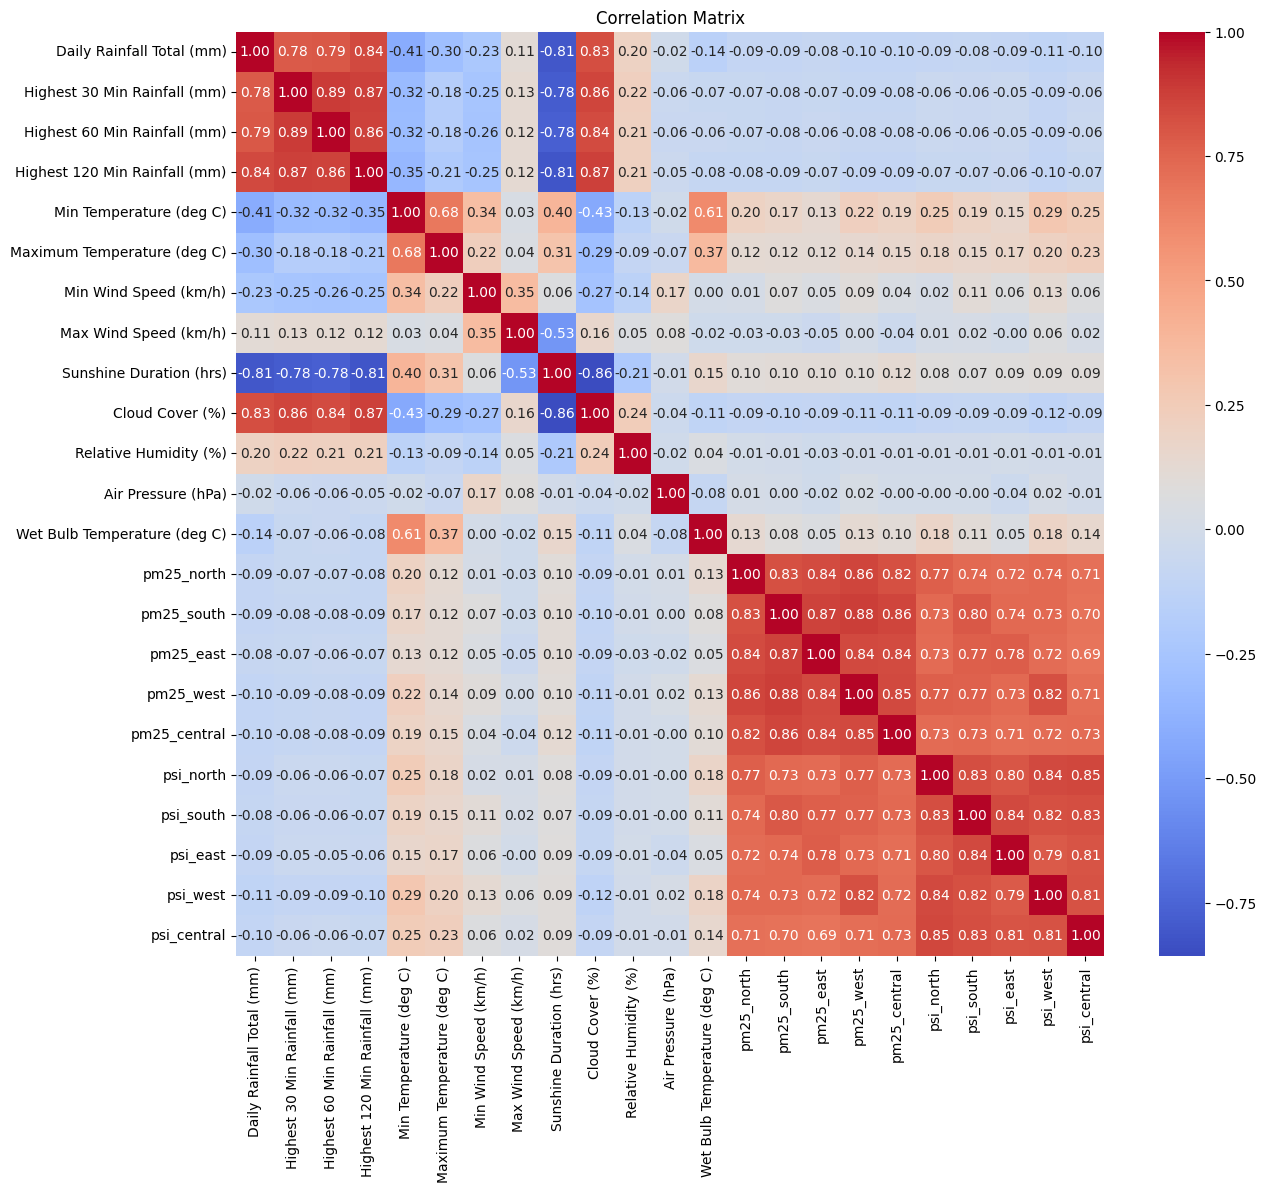

In [1078]:
numeric_data = merged_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()

# Correlation matrix visualization
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [1079]:
# Find features with correlation greater than the threshold

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

correlation_threshold = 0.75
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]


print("\nHighly correlated features:")
for i in range (0, len(to_drop)):
    print(str(i + 1) + ". " + to_drop[i])


Highly correlated features:
1. Highest 30 Min Rainfall (mm)
2. Highest 60 Min Rainfall (mm)
3. Highest 120 Min Rainfall (mm)
4. Cloud Cover (%)
5. pm25_south
6. pm25_east
7. pm25_west
8. pm25_central
9. psi_north
10. psi_south
11. psi_east
12. psi_west
13. psi_central


1. A corr threshold of 0.75 nicely identifies the redundant features. 
2. For the first 4 features, I will perform some visualization before removing. I think that daily\
total rainfall is enough to represent these 4 features. 
3. For pm25 and psi I will probably perform feature engineering to get an average.\
because the I'm not sure the label represents which area. 

#### identify redundant categorical features

In [1080]:
categorical_cols = merged_df.select_dtypes(include=['object']).columns

# Check unique values
for col in categorical_cols:
    unique_values = merged_df[col].nunique()
    print(f"Column '{col}' has {unique_values} unique values")

Column 'data_ref_x' has 3197 unique values
Column 'Dew Point Category' has 25 unique values
Column 'Wind Direction' has 32 unique values
Column 'Daily Solar Panel Efficiency' has 3 unique values
Column 'data_ref_y' has 3197 unique values


1. 'data_ref_x' and 'data_ref_y' is not relevant, I will remove it first.
2. Check for unique values in 'dew point category' and 'wind direction'. 

In [1081]:
to_drop = ["data_ref_x", "data_ref_y"]
merged_df.drop(columns=to_drop, inplace=True)

In [1082]:
# checking 'wind direction'
unique_values = merged_df['Wind Direction'].unique()
print(unique_values)


['W' 'S' 'E' 'east' 'NORTHEAST' 'NW' 'NE' 'SE' 'Southward' 'W.'
 'southeast' 'SW' 'N' 'Northward' 'SOUTHEAST' 'northwest' 'west' 'NORTH'
 'south' 'NE.' 'SE.' 'NORTHWEST' 'northeast' 'SW.' 'north' 'SOUTH' 'E.'
 'S.' 'NW.' 'WEST' 'N.' 'EAST']


In [1083]:
# checking 'dew point category'
unique_values = merged_df['Dew Point Category'].unique()
print(unique_values)

['VH' 'Very High' 'Low' 'High' 'Moderate' 'Extreme' 'Very Low' 'very low'
 'LOW' 'VERY HIGH' 'High Level' 'very high' 'HIGH' 'H' 'M' 'moderate' 'VL'
 'MODERATE' 'high' 'Below Average' 'VERY LOW' 'Minimal' 'low' 'Normal' 'L']


I realized some values represent the same thing, but represented in different format\
so I am going to map them

In [1084]:
# Mapping dictionary for wind directions
wind_direction_map = {
    'N.': 'N',
    'W': 'W',
    'S': 'S',
    'E': 'E',
    'east': 'E',
    'NORTHEAST': 'NE',
    'NW': 'NW',
    'NE': 'NE',
    'SE': 'SE',
    'Southward': 'S',
    'W.': 'W',
    'southeast': 'SE',
    'SW': 'SW',
    'N': 'N',
    'Northward': 'N',
    'SOUTHEAST': 'SE',
    'northwest': 'NW',
    'west': 'W',
    'NORTH': 'N',
    'south': 'S',
    'NE.': 'NE',
    'SE.': 'SE',
    'NORTHWEST': 'NW',
    'northeast': 'NE',
    'SW.': 'SW',
    'north': 'N',
    'SOUTH': 'S',
    'E.': 'E',
    'S.': 'S',
    'NW.': 'NW',
    'WEST': 'W',
    'EAST': 'E'
}

# Apply the mapping to overwrite the existing 'Wind Direction' column
merged_df['Wind Direction'] = merged_df['Wind Direction'].map(wind_direction_map)
print(merged_df['Wind Direction'].unique())

['W' 'S' 'E' 'NE' 'NW' 'SE' 'SW' 'N']


In [1085]:
# Change dee point category to lower case
merged_df['Dew Point Category'] = merged_df['Dew Point Category'].str.lower()

# Mapping dictionary for 'dew point category'
label_map = {
    'vh': 'Very High',
    'very high': 'Very High',
    'low': 'Low',
    'vl': 'Very Low',
    'very low': 'Very Low',
    'high': 'High',
    'moderate': 'Moderate',
    'm': 'Moderate',
    'h': 'High',
    'extreme': 'Extreme',
    'minimal': 'Minimal',
    'normal': 'Normal',
    'high level': 'High',
    'below average': 'Below Average',
    'l': 'Low'  
}


merged_df['Dew Point Category'] = merged_df['Dew Point Category'].map(label_map).fillna('Unknown')
print(merged_df['Dew Point Category'].unique())


['Very High' 'Low' 'High' 'Moderate' 'Extreme' 'Very Low' 'Below Average'
 'Minimal' 'Normal']


## Data Visualization

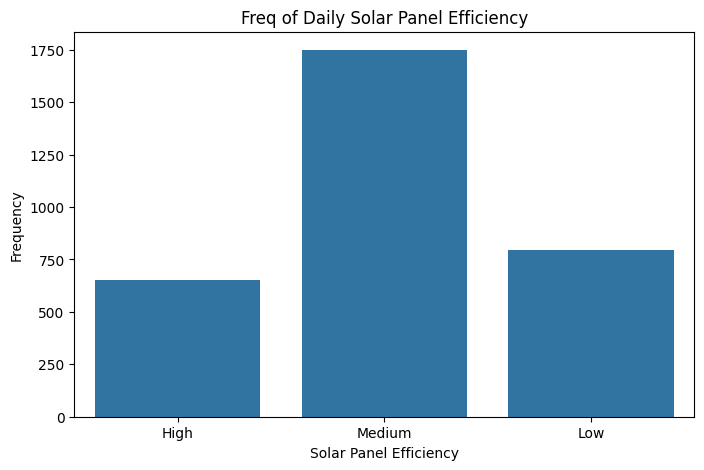

In [1086]:
# bar plot for Daily Solar Panel Efficiency
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='Daily Solar Panel Efficiency')
plt.title('Freq of Daily Solar Panel Efficiency')
plt.xlabel('Solar Panel Efficiency')
plt.ylabel('Frequency')
plt.show()

There are more medium efficiency. Slightly more low than high efficiency 

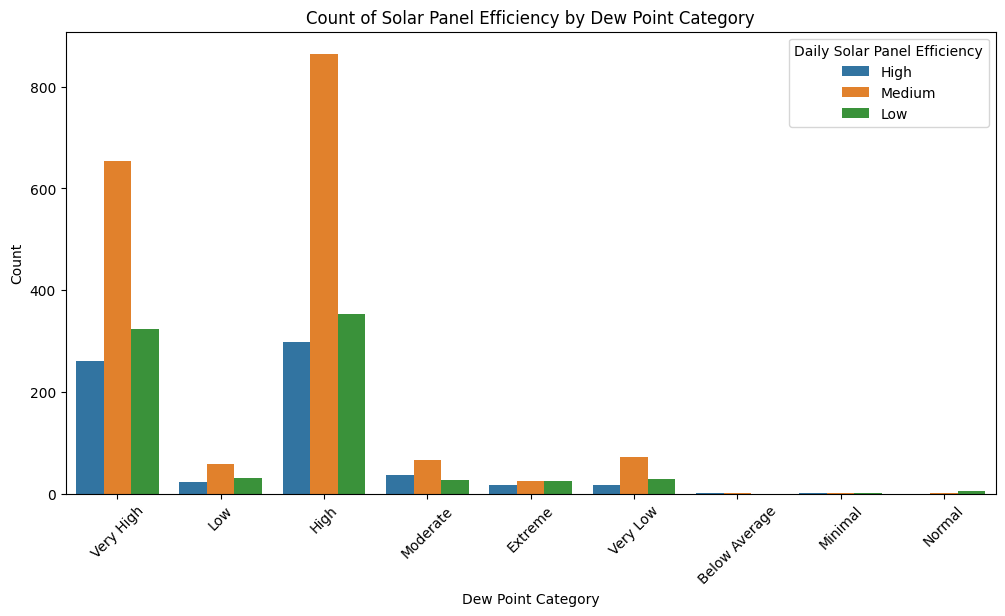

In [1087]:
# Count plot for Dew Point Category and Solar Panel Efficiency
plt.figure(figsize=(12, 6))
sns.countplot(x='Dew Point Category', hue='Daily Solar Panel Efficiency', data=merged_df)
plt.title('Count of Solar Panel Efficiency by Dew Point Category')
plt.xlabel('Dew Point Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


High and Very High dew point categories have a significant number of medium efficiency counts. \
This might indicate that higher dew points has some influence on maintaining medium efficiency levels.

Categories with fewer observations (like Minimal, Normal, Below Average) \
might not provide sufficient data to draw strong conclusion, I can consider combine them together later.

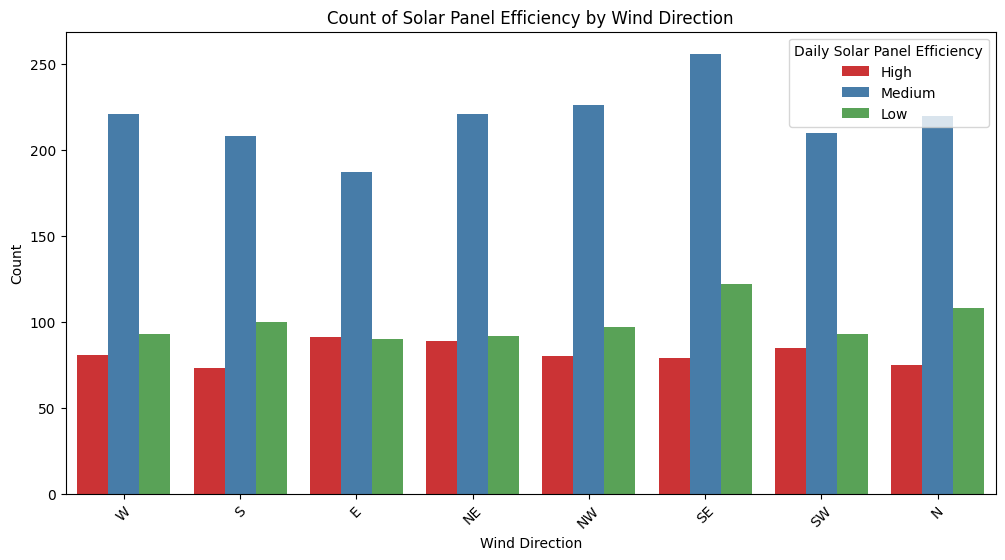

In [1088]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for Wind Direction and Solar Panel Efficiency
plt.figure(figsize=(12, 6))
sns.countplot(x='Wind Direction', hue='Daily Solar Panel Efficiency', data=merged_df, palette='Set1')
plt.title('Count of Solar Panel Efficiency by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The overall trend suggests that medium efficiency is the norm for most wind directions, \
while low efficiency is more common than high efficiency. 

This might imply that wind direction is a less significant feature. 

C:\Users\wu_li\AppData\Local\Temp\ipykernel_6568\940056373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Wind Direction', y='Cloud Cover (%)', data=merged_df, palette='Set1')


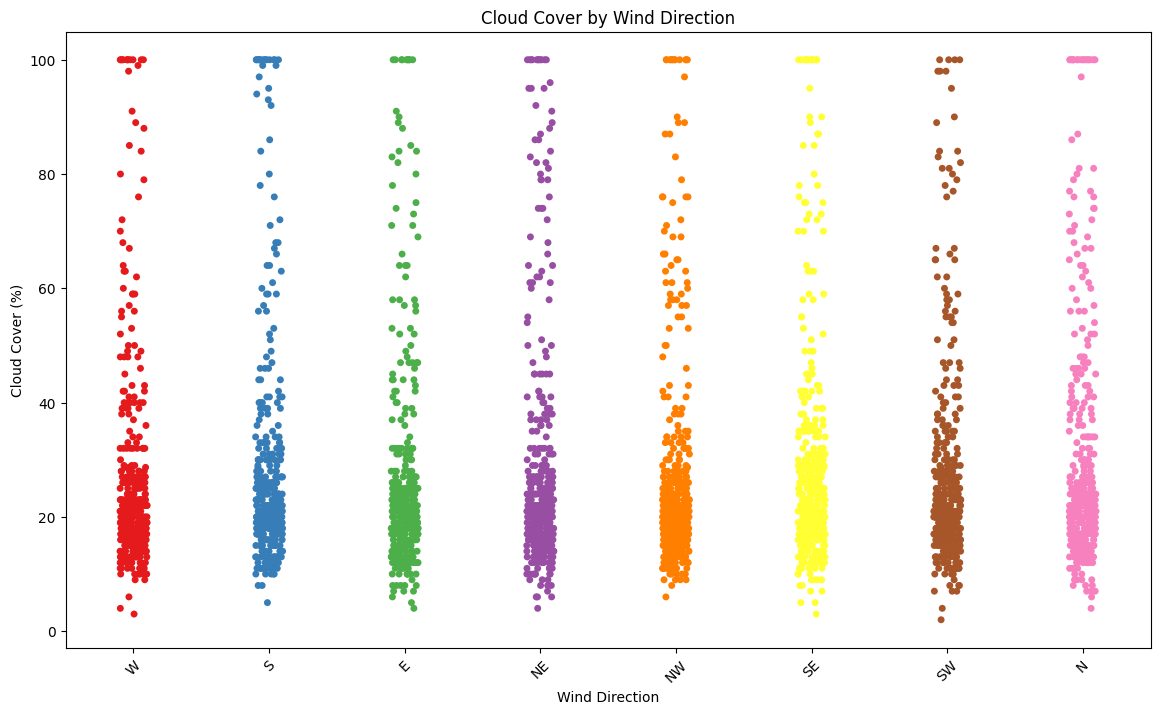

In [1148]:
plt.figure(figsize=(14, 8))
sns.stripplot(x='Wind Direction', y='Cloud Cover (%)', data=merged_df, palette='Set1')
plt.title('Cloud Cover by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Cloud Cover (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

The spread of cloud cover values appears similar across all wind directions, \
indicating that cloud cover is relatively uniform regardless of the wind direction.

C:\Users\wu_li\AppData\Local\Temp\ipykernel_6568\4173900134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Daily Solar Panel Efficiency', y='Daily Rainfall Total (mm)', data=merged_df, palette='Set1')


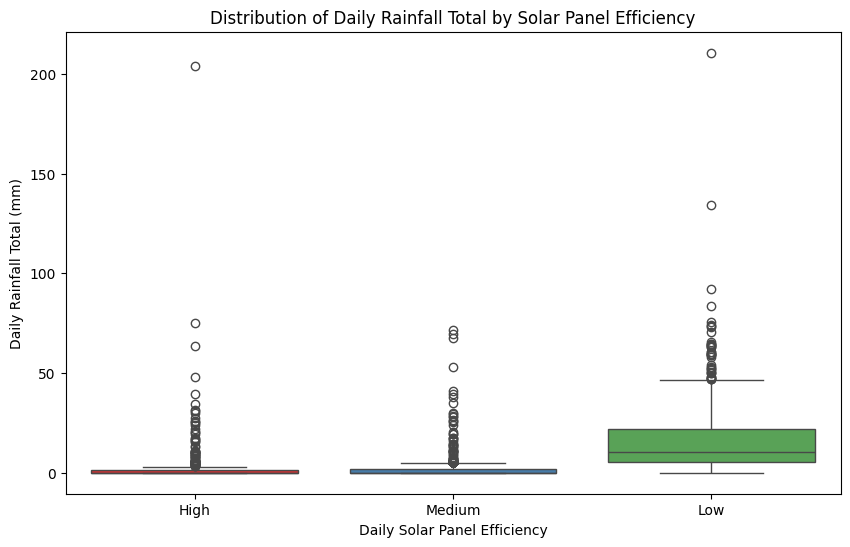

In [1146]:
# Box plot for total rainfall against the label
plt.figure(figsize=(10, 6))
sns.boxplot(x='Daily Solar Panel Efficiency', y='Daily Rainfall Total (mm)', data=merged_df, palette='Set1')
plt.title('Distribution of Daily Rainfall Total by Solar Panel Efficiency')
plt.xlabel('Daily Solar Panel Efficiency')
plt.ylabel('Daily Rainfall Total (mm)')
plt.show()

Median for medium and High efficiency is near zero, indicating that these levels occurs often when there are no rain.
While low efficiency has wider IQR, indicating more variability and higher rainfall on these days. 

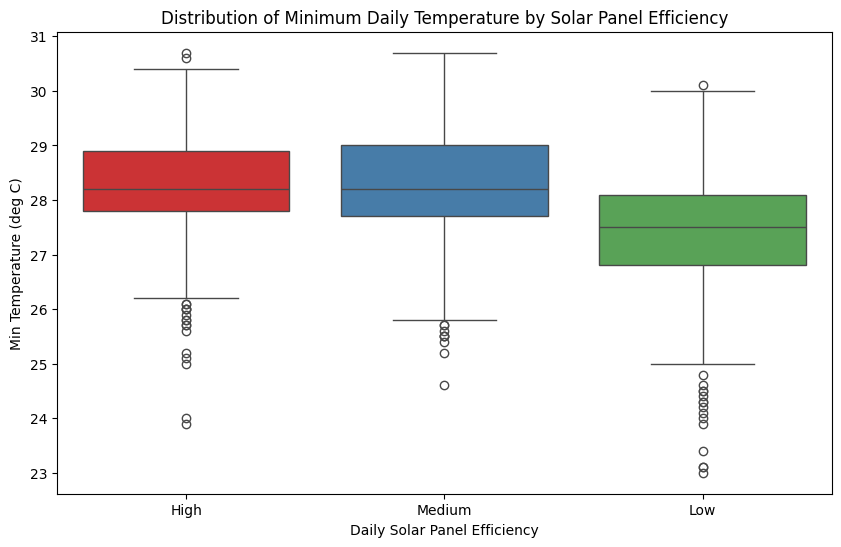

In [1143]:
# box plot of min temp
plt.figure(figsize=(10, 6))
sns.boxplot(x='Daily Solar Panel Efficiency', y='Min Temperature (deg C)', hue='Daily Solar Panel Efficiency', \
    data=merged_df, palette='Set1')
plt.title('Distribution of Minimum Daily Temperature by Solar Panel Efficiency')
plt.xlabel('Daily Solar Panel Efficiency')
plt.ylabel('Min Temperature (deg C)')
plt.show()


Both high and medium efficiency have a median of 28.2, while low efficiency is slightly lower at median of 27.6.\
The plot indicates that higher minimum temperatures are slightly more favorable for achieving higher solar panel efficiency.


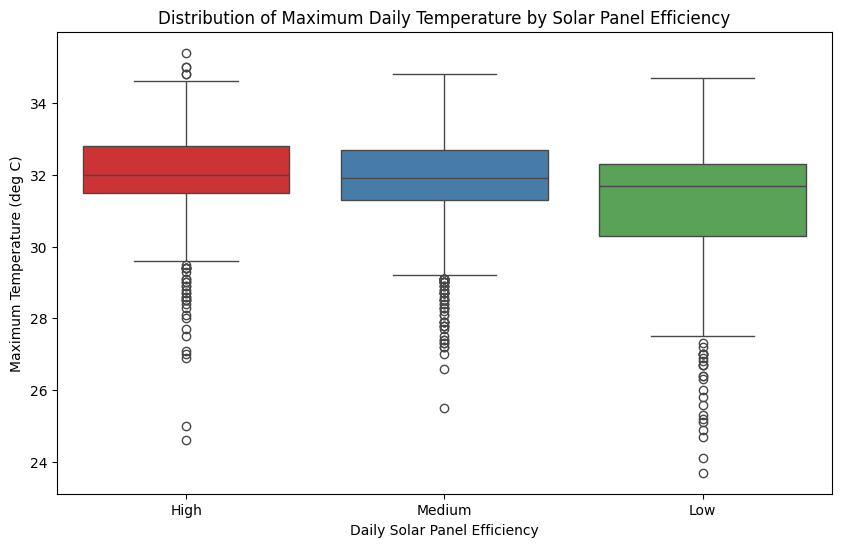

In [1144]:
# boxplot for Maximum Temperature
plt.figure(figsize=(10, 6))
sns.boxplot(x='Daily Solar Panel Efficiency', y='Maximum Temperature (deg C)', hue='Daily Solar Panel Efficiency', \
    data=merged_df, palette='Set1')
plt.title('Distribution of Maximum Daily Temperature by Solar Panel Efficiency')
plt.xlabel('Daily Solar Panel Efficiency')
plt.ylabel('Maximum Temperature (deg C)')
plt.show()


Both high and medium efficiency have a similar median of 32. But Low efficiency has more variability,\
it can occur over a wider range of temperatures. 

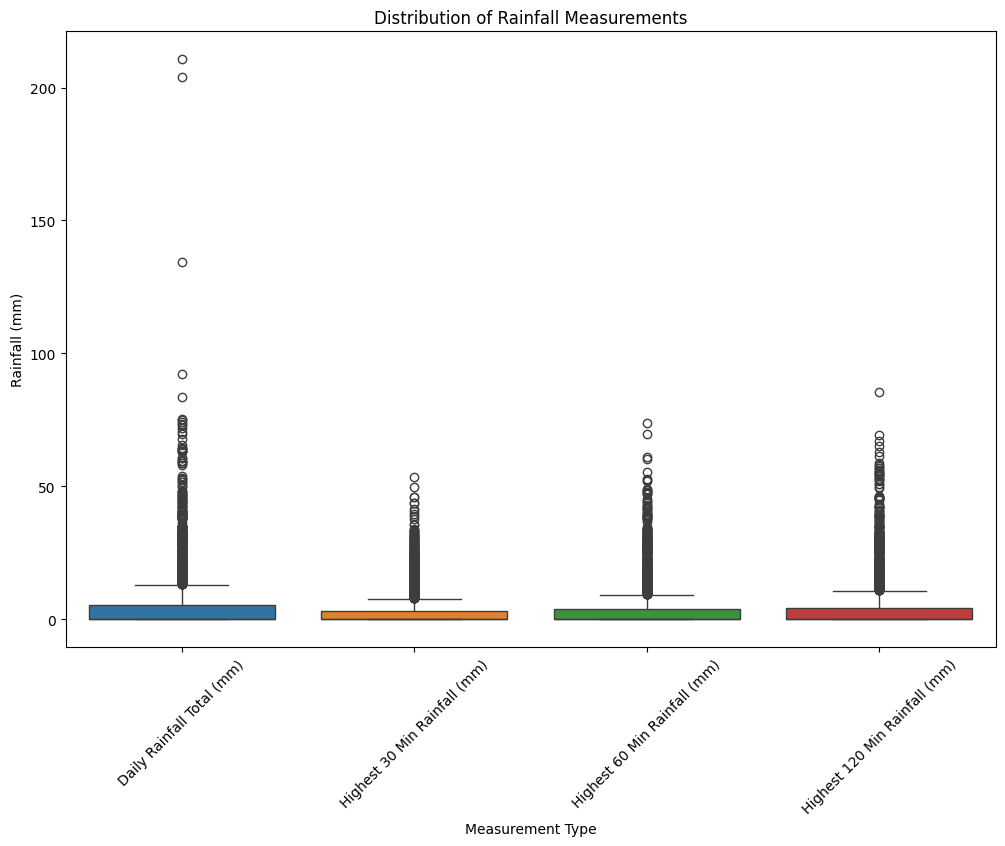

In [1115]:
# Specify the columns for rainfall measurements
rainfall_columns = [
    'Daily Rainfall Total (mm)',
    'Highest 30 Min Rainfall (mm)',
    'Highest 60 Min Rainfall (mm)',
    'Highest 120 Min Rainfall (mm)'
]

# Create the box plot for rainfall measurements
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df[rainfall_columns])
plt.title('Distribution of Rainfall Measurements')
plt.ylabel('Rainfall (mm)')
plt.xlabel('Measurement Type')
plt.xticks(ticks=[0, 1, 2, 3], labels=[
    'Daily Rainfall Total (mm)', 
    'Highest 30 Min Rainfall (mm)', 
    'Highest 60 Min Rainfall (mm)', 
    'Highest 120 Min Rainfall (mm)'
], rotation=45)
plt.show()

The median (middle line of the box) for all rainfall measurements is relatively low, \
indicating that most rainfall events are of low intensity.

Ocurrence and consistency of rainfall is consistent across different time intervals. 

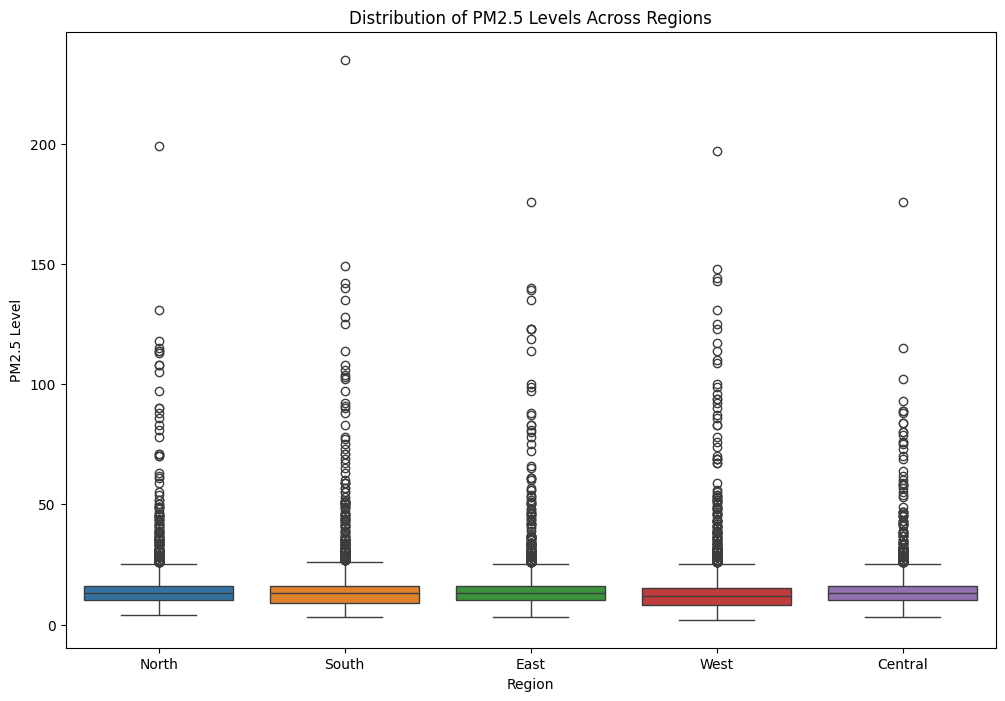

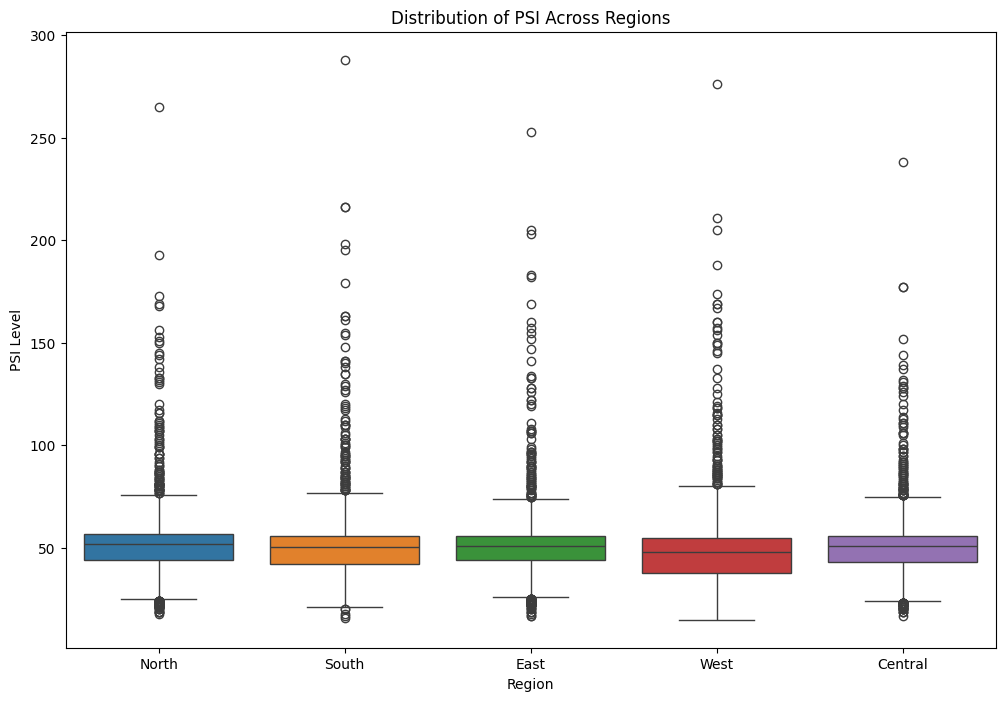

In [1092]:
# box plot of PM2.5 and PSI across all regions 
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df[['pm25_north', 'pm25_south', 'pm25_east', 'pm25_west', 'pm25_central']])
plt.title('Distribution of PM2.5 Levels Across Regions')
plt.ylabel('PM2.5 Level')
plt.xlabel('Region')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['North', 'South', 'East', 'West', 'Central'])
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df[['psi_north', 'psi_south', 'psi_east', 'psi_west', 'psi_central']])
plt.title('Distribution of PSI Across Regions')
plt.ylabel('PSI Level')
plt.xlabel('Region')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['North', 'South', 'East', 'West', 'Central'])
plt.show()


PM2.5 are relatively stable across all regions. \
PSI are relatively stable across all regions.\
I will perform feature engineering in task 2.

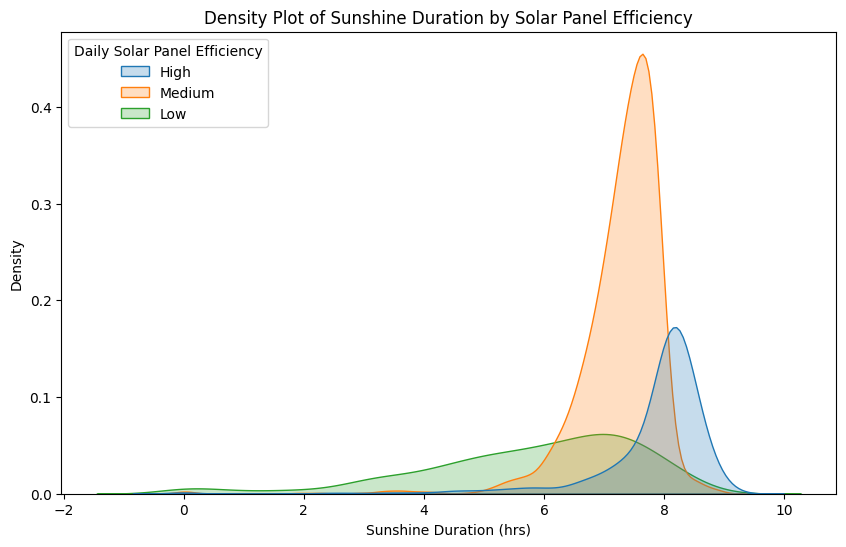

In [1094]:
# KDE plot for Sunshine Duration by Solar Panel Efficiency
plt.figure(figsize=(10, 6))
sns.kdeplot(data=merged_df, x='Sunshine Duration (hrs)', hue='Daily Solar Panel Efficiency', fill=True)
plt.title('Density Plot of Sunshine Duration by Solar Panel Efficiency')
plt.xlabel('Sunshine Duration (hrs)')
plt.ylabel('Density')
plt.show()

Higher sunshine duration tends to favor medium (7-8 hours) and high efficiency (8 hours), whereas lower \
sunshine duration is associated with low efficiency (6-7 hours). This aligns with the expectation \
that more sunlight generally improves solar panel efficiency.

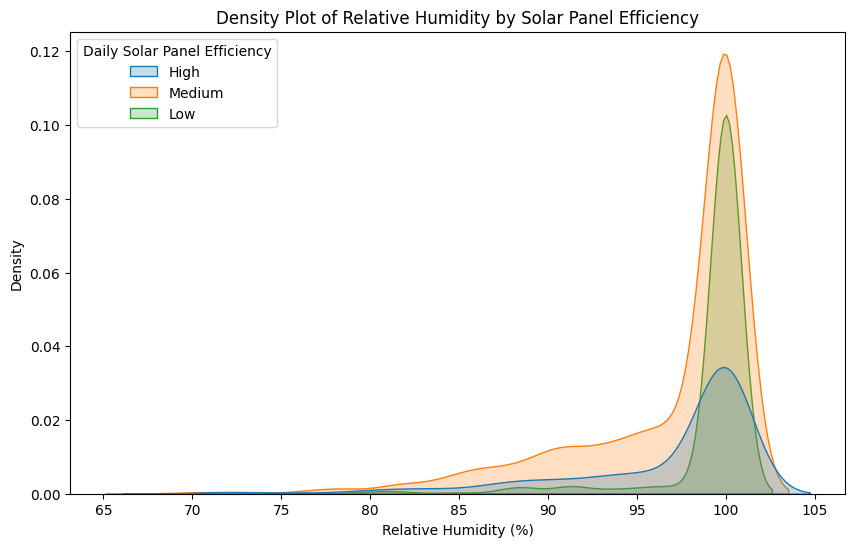

In [1150]:
# density plot for relative humidity by Solar Panel Efficiency
plt.figure(figsize=(10, 6))
sns.kdeplot(data=merged_df, x='Relative Humidity (%)', hue='Daily Solar Panel Efficiency', fill=True)
plt.title('Density Plot of Relative Humidity by Solar Panel Efficiency')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Density')
plt.show()

The plot provides clear evidence that medium and low efficiency levels are most common at very high humidity levels, \
while high efficiency shows a broader distribution across a range of high humidity values. 

This suggests that while high humidity is generally associated with medium efficiency, \
there are conditions under which high efficiency can still be achieved when humidity is lower.

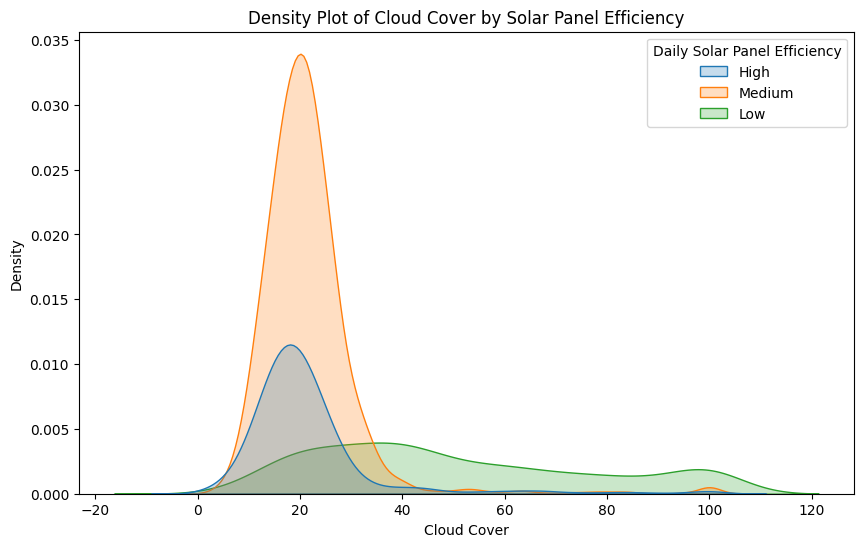

In [1153]:
# KDE plot for cloud cover
plt.figure(figsize=(10, 6))
sns.kdeplot(data=merged_df, x='Cloud Cover (%)', hue='Daily Solar Panel Efficiency', fill=True)
plt.title('Density Plot of Cloud Cover by Solar Panel Efficiency')
plt.xlabel('Cloud Cover')
plt.ylabel('Density')
plt.show()

Operational Planning: Medium and high efficiencies are more likely on days with low cloud cover. \
These days should be prioritized for maximizing solar power generation and energy storage.

Maintenance Scheduling: Days with high cloud cover are associated with low efficiency, \
making them ideal for scheduling maintenance activities to minimize the impact on power generation.

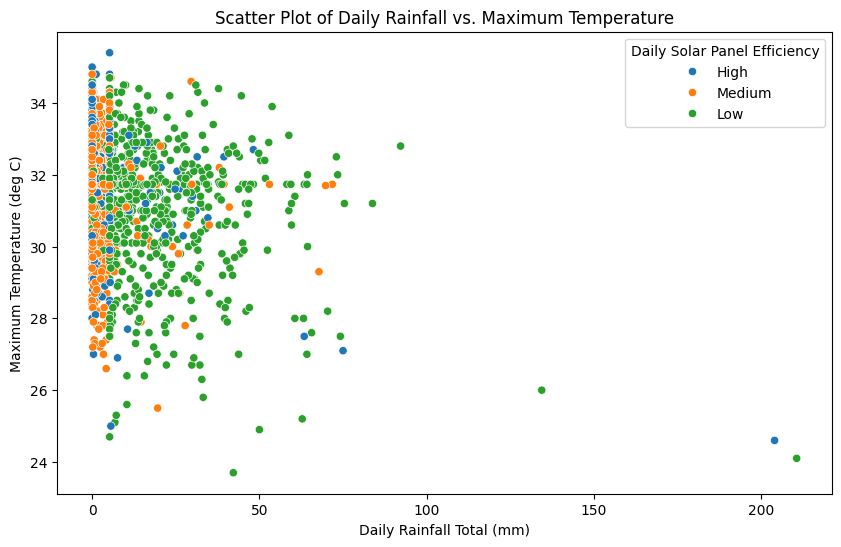

In [1096]:
# scatter plot for Rainfall vs. Maximum Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Rainfall Total (mm)', y='Maximum Temperature (deg C)', hue='Daily Solar Panel Efficiency', data=merged_df)
plt.title('Scatter Plot of Daily Rainfall vs. Maximum Temperature')
plt.xlabel('Daily Rainfall Total (mm)')
plt.ylabel('Maximum Temperature (deg C)')
plt.show()


Maximum temperature seems to have a wide range irrespective of the amount of daily rainfall, \
indicating that temperature does not strongly correlate with rainfall in this dataset.\
There are a few outliers with high rainfall values (around 50 mm and 200 mm), but these are less common.

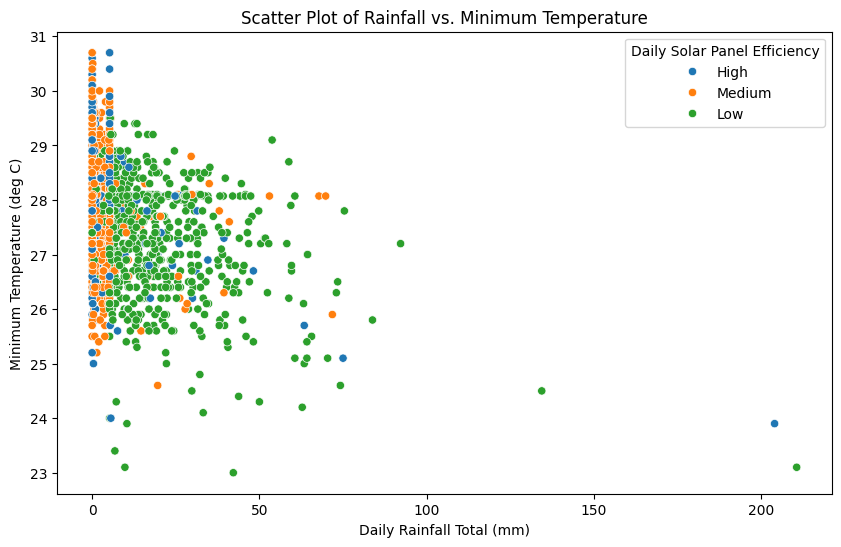

In [1097]:
# scatter plot for Rainfall vs. Minimum Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Rainfall Total (mm)', y='Min Temperature (deg C)', hue='Daily Solar Panel Efficiency', data=merged_df)
plt.title('Scatter Plot of Rainfall vs. Minimum Temperature')
plt.xlabel('Daily Rainfall Total (mm)')
plt.ylabel('Minimum Temperature (deg C)')
plt.show()

Similar to maximum temperature, but minimum temperature ranges from 23 - 31 deg c.

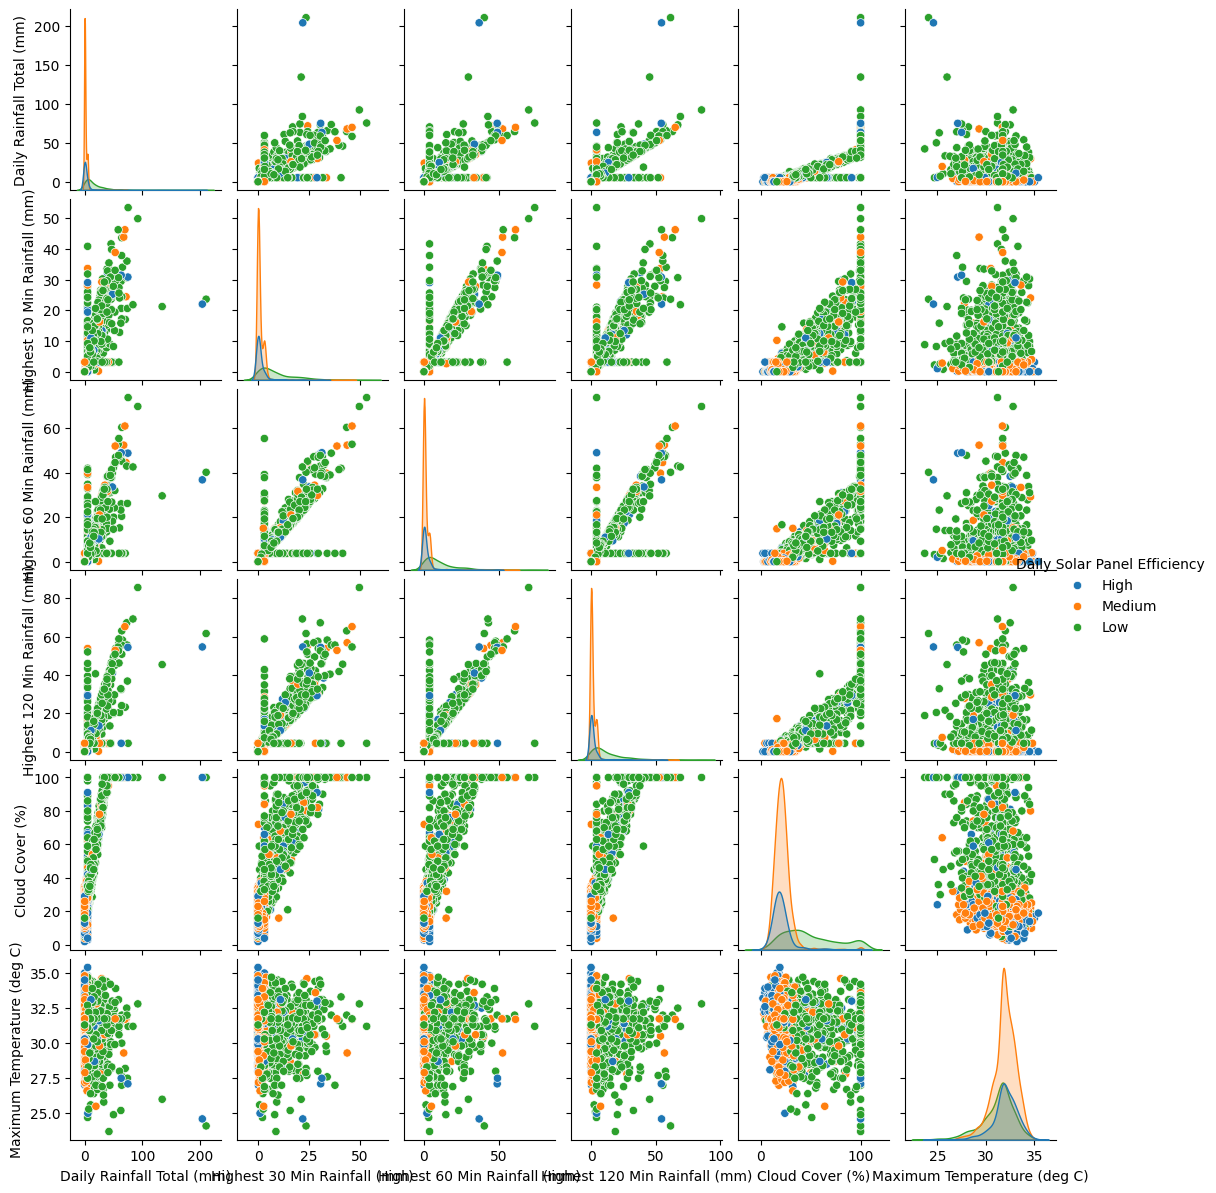

In [1112]:
# Select the columns to include in the scatterplot matrix
columns_to_plot = [
    'Daily Rainfall Total (mm)', 
    'Highest 30 Min Rainfall (mm)', 
    'Highest 60 Min Rainfall (mm)', 
    'Highest 120 Min Rainfall (mm)',
    'Cloud Cover (%)',
    'Maximum Temperature (deg C)'
]


df_subset = merged_df[columns_to_plot + ['Daily Solar Panel Efficiency']]

# Create the pairplot with hue based on the label
g = sns.pairplot(df_subset, hue='Daily Solar Panel Efficiency', diag_kind='kde')
g.fig.set_size_inches(12, 12)
plt.show()

Based on the scatterplot matrix, although "Cloud Cover (%)" is highly correlated with rainfall measurements, \
which could suggest redundancy, its unique patterns with temperature indicate it might still provide useful information.

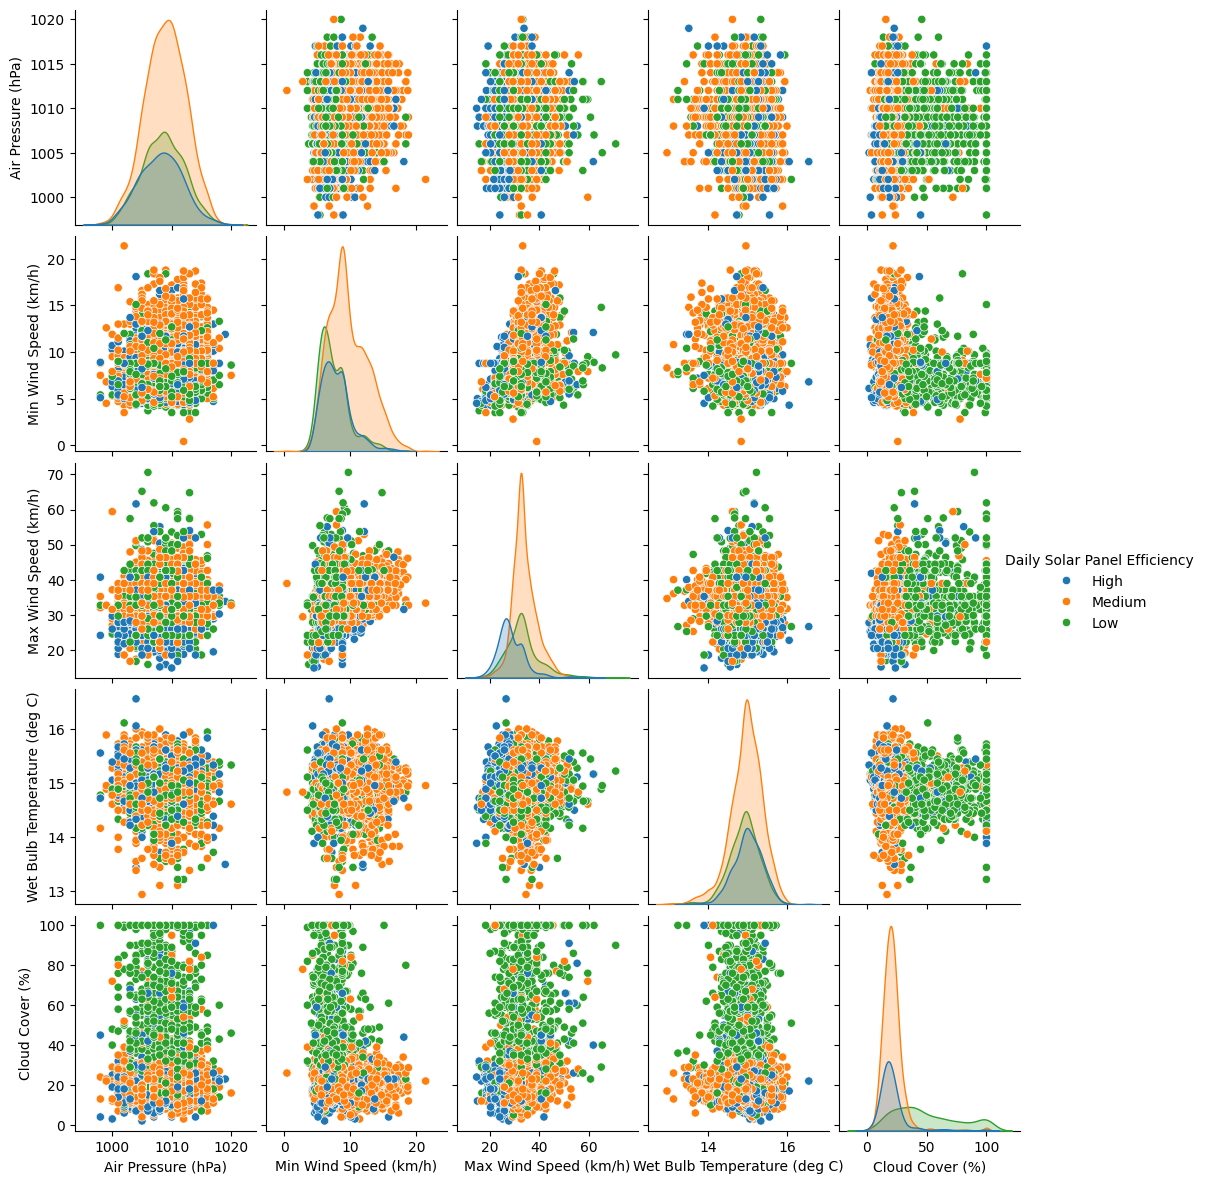

In [1113]:
# Select the columns to include in the scatterplot matrix
columns_to_plot = [
    'Air Pressure (hPa)', 
    'Min Wind Speed (km/h)', 
    'Max Wind Speed (km/h)', 
    'Wet Bulb Temperature (deg C)',
    'Cloud Cover (%)'
]


df_subset = merged_df[columns_to_plot + ['Daily Solar Panel Efficiency']]

# Create the pairplot with hue based on the label
g = sns.pairplot(df_subset, hue='Daily Solar Panel Efficiency', diag_kind='kde')
g.fig.set_size_inches(12, 12)
plt.show()

- Min Wind Speed: more medium efficiency when 10-15 km/h.

- Max Wind Speed: medium efficiency are most common at around 30-40 km/h

- Wet Bulb Temp: High and low efficiency points are densly packed around 14.5 - 15.5 deg c,\
 while a lot of medium points go below 14.5.

- Cloud Cover: Low efficiency when Cloud Cover is Higher from 40 - 100. Mixture of medium and high efficiency when <40.

### Features to plot against "month"

Understanding how weather conditions change throughout the year can help in \
planning operations and maintenance schedules. For example, certain months might \
consistently show lower efficiency, indicating ideal times for maintenance.

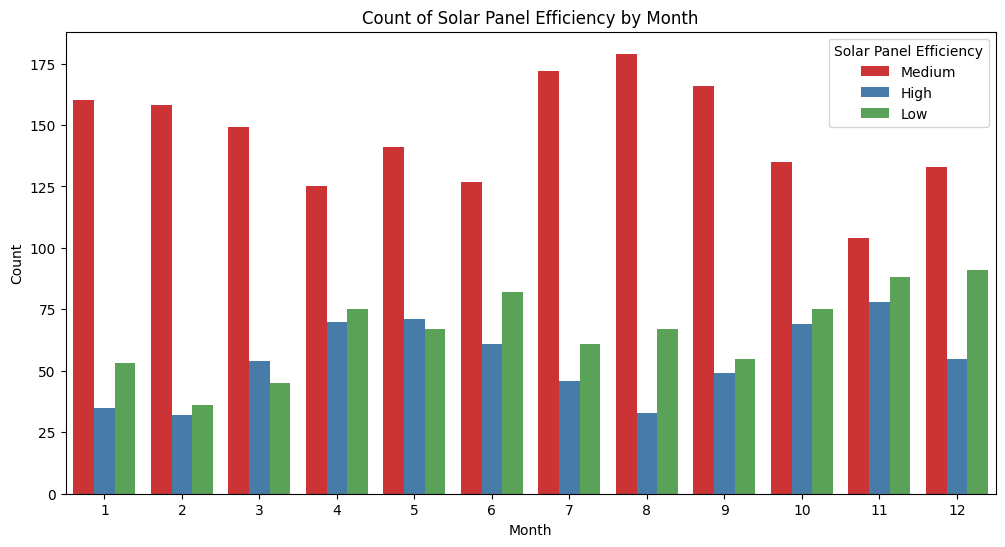

In [1105]:
# Extract the month from the date column
merged_df['Month'] = merged_df['date'].dt.month

# Create a count plot for Month and Solar Panel Efficiency
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Daily Solar Panel Efficiency', data=merged_df, palette='Set1')
plt.title('Count of Solar Panel Efficiency by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Solar Panel Efficiency')
plt.show()

- Medium efficiency is the most common throughout the year, but slightly lesser in April - June, Oct - Dec.
- High efficiency is less frequent in Jan, Feb and Aug.
- Low efficiency peaks in April to June, October to December.

This indicating potentially challenging conditions for solar panel performance during different months.

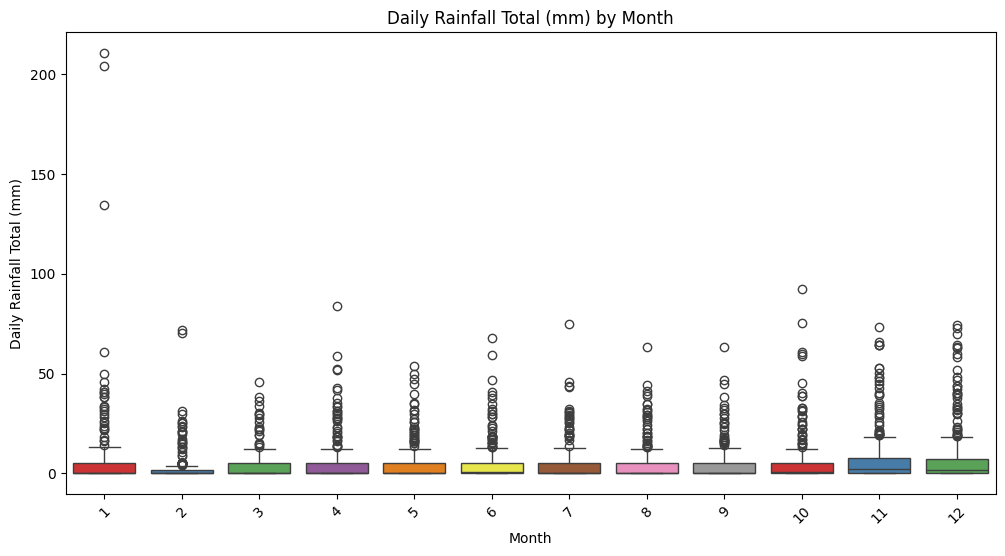

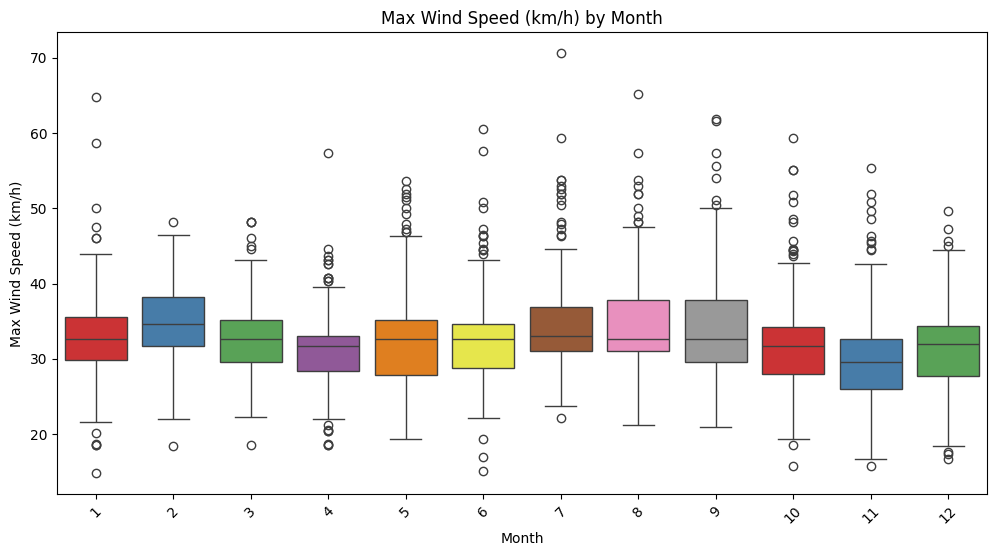

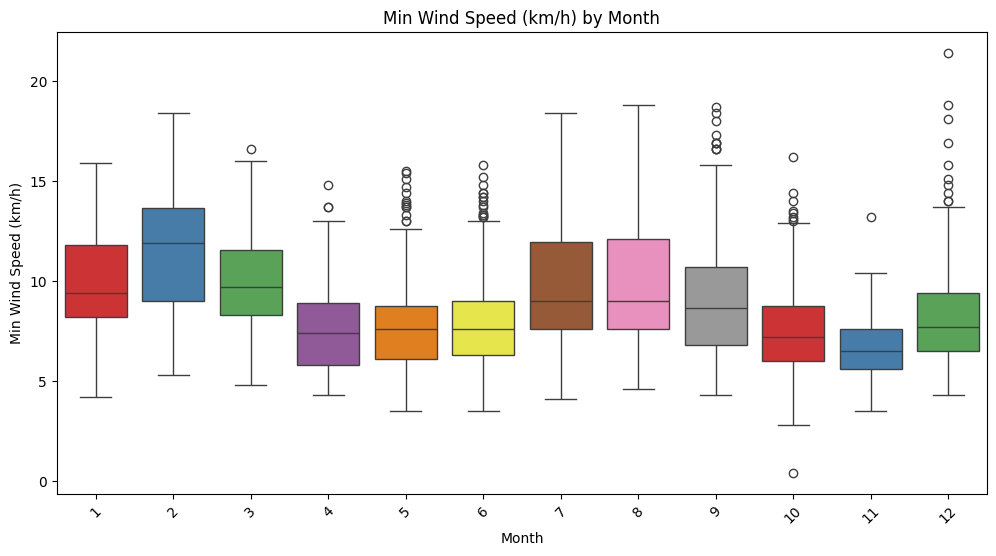

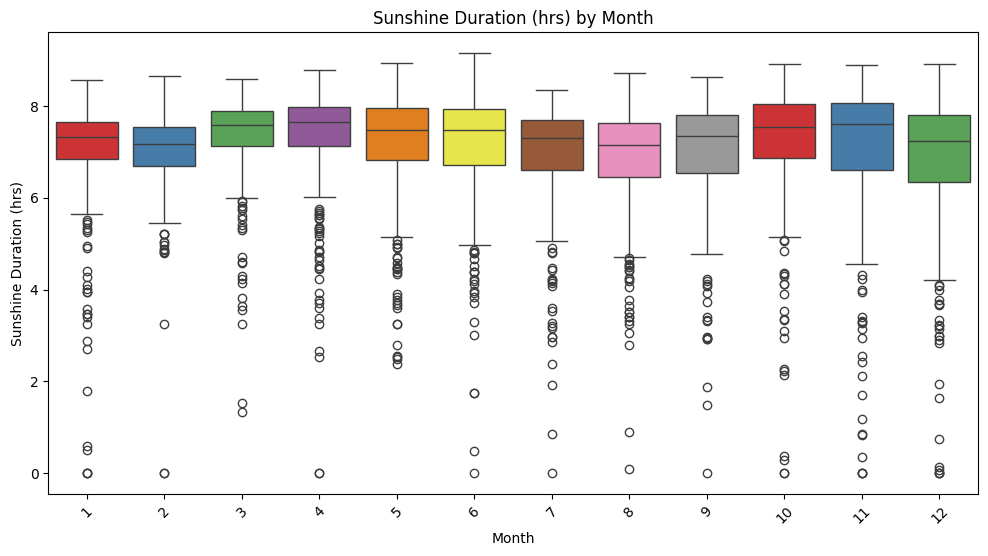

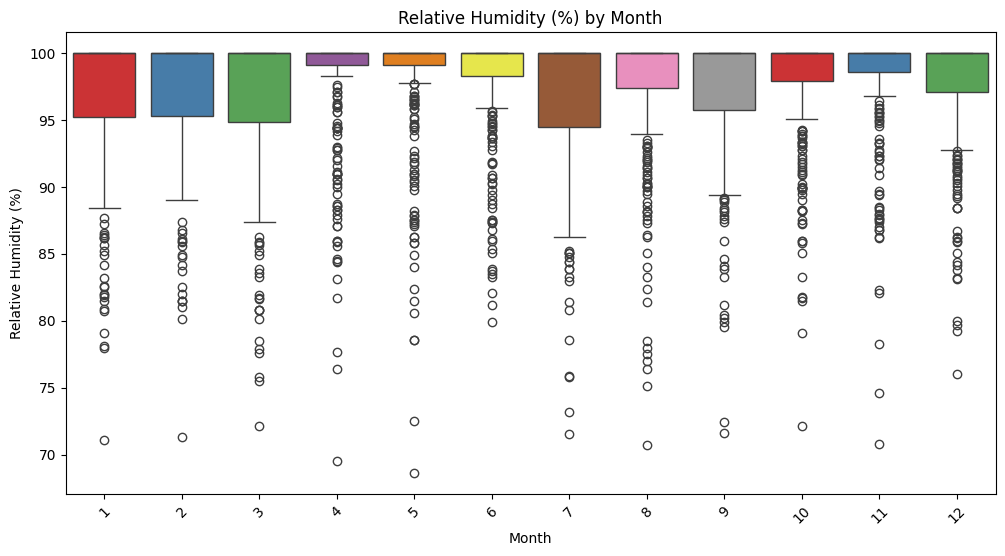

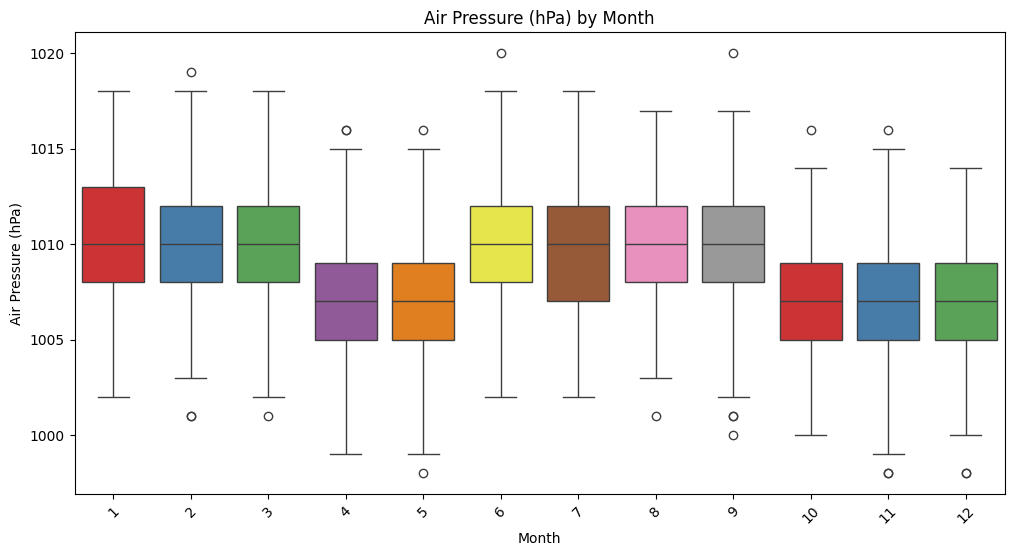

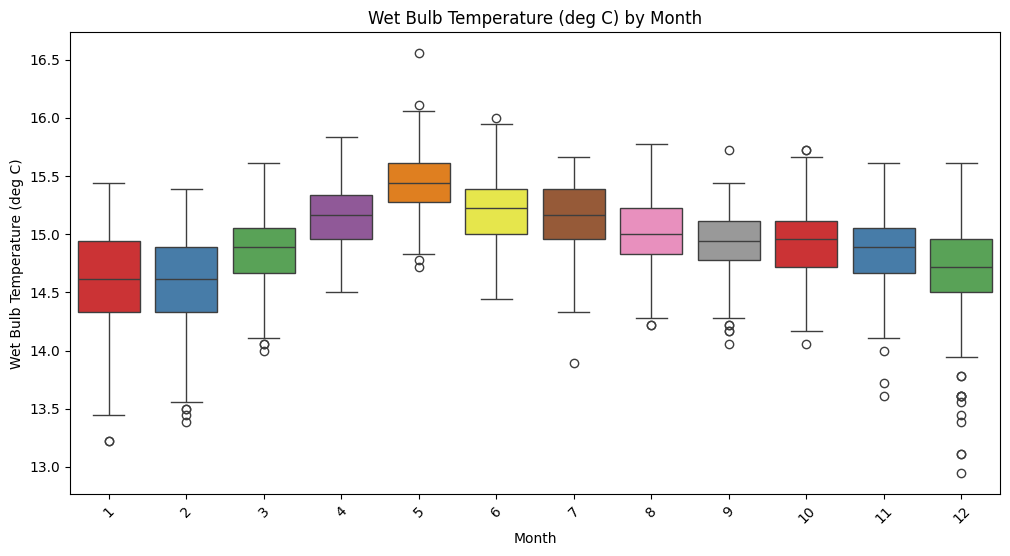

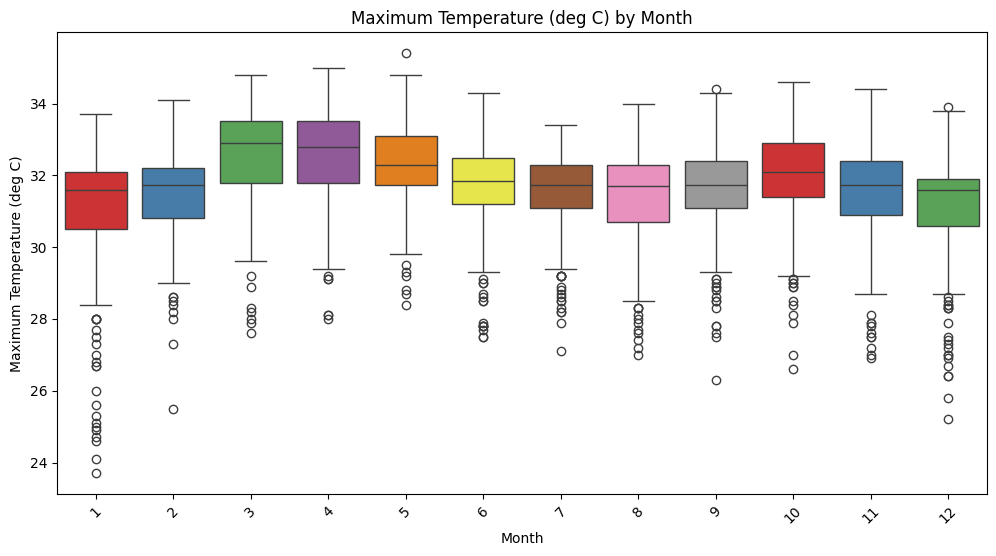

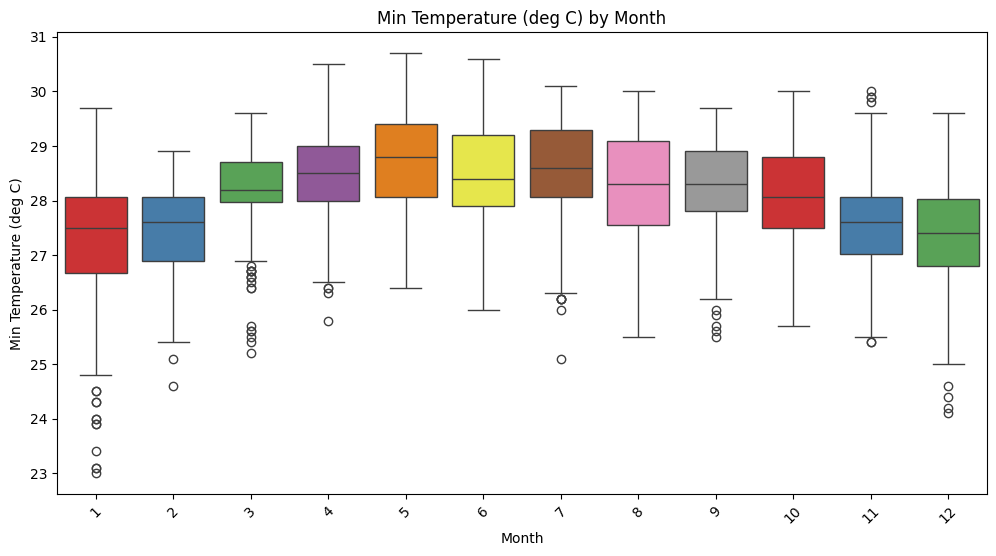

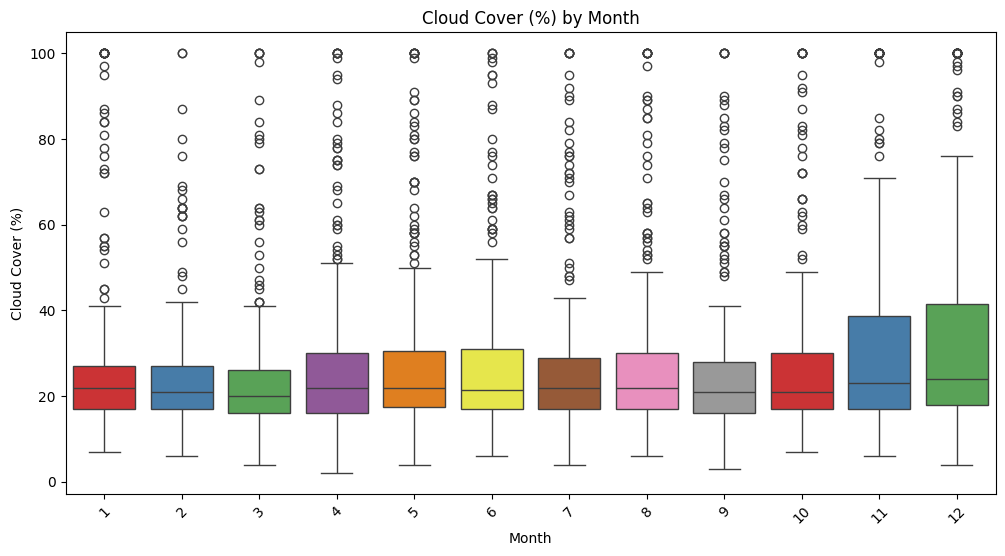

In [1155]:
# List of numerical features to plot against Month
numerical_features = [
    'Daily Rainfall Total (mm)', 
    'Max Wind Speed (km/h)', 
    'Min Wind Speed (km/h)', 
    'Sunshine Duration (hrs)', 
    'Relative Humidity (%)',
    'Air Pressure (hPa)',
    'Wet Bulb Temperature (deg C)',
    'Maximum Temperature (deg C)',
    'Min Temperature (deg C)',
    'Cloud Cover (%)',
]

# Create a box plot for each numerical feature against Month
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Month', y=feature, data=merged_df, hue='Month', palette='Set1', dodge=False)
    plt.title(f'{feature} by Month')
    plt.xlabel('Month')
    plt.ylabel(feature)
    plt.legend([],[], frameon=False)  
    plt.xticks(rotation=45)
    plt.show()



- Daily rainfall total: Most months have a similar median daily rainfall total, typically close to zero, \
indicating that many days have little to no rainfall. January has extreme outliers exceeding 200mm, indicating occasional heavy rain.

- Max wind speed: The median maximum wind speeds are fairly consistent across all months, generally between 30-35 km/h.

- Min wind speed: Winter months (January, February) tend to have higher minimum wind speeds compared to summer months (June, July). \
More outliers in May and June.

- Sunshine duration: The median sunshine duration is around 7-8 hours for most months, with summer months having slightly higher values.

- humidity: Median humidity is consistent throughout all the months at 95-100%, with April and may having a lower variability.

- Air pressure: April, May, October, Novemeber, Decemer has lower median air pressure compared to the other months.

- Wet bulb temperature: Median is lower but higher variability in months December to March. More outliers in Dec.

- Maximum Temperature: November to February have lower median maximum temperature.

- Minimum Temperature: November to February have lower median minimum temperature. Higher Variability from April to August. \
more outliers in Jan and March

- Cloud cover: While there is some monthly variation, it is not drastic. Cloud cover seems to be relatively evenly \
distributed throughout the year, with slight increases in variability and higher median \
values during the end of the year (November and December).
